# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("artifacts/customer_booking.csv", encoding="ISO-8859-1")
df

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [4]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [5]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [6]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [7]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


<Axes: xlabel='num_passengers', ylabel='Count'>

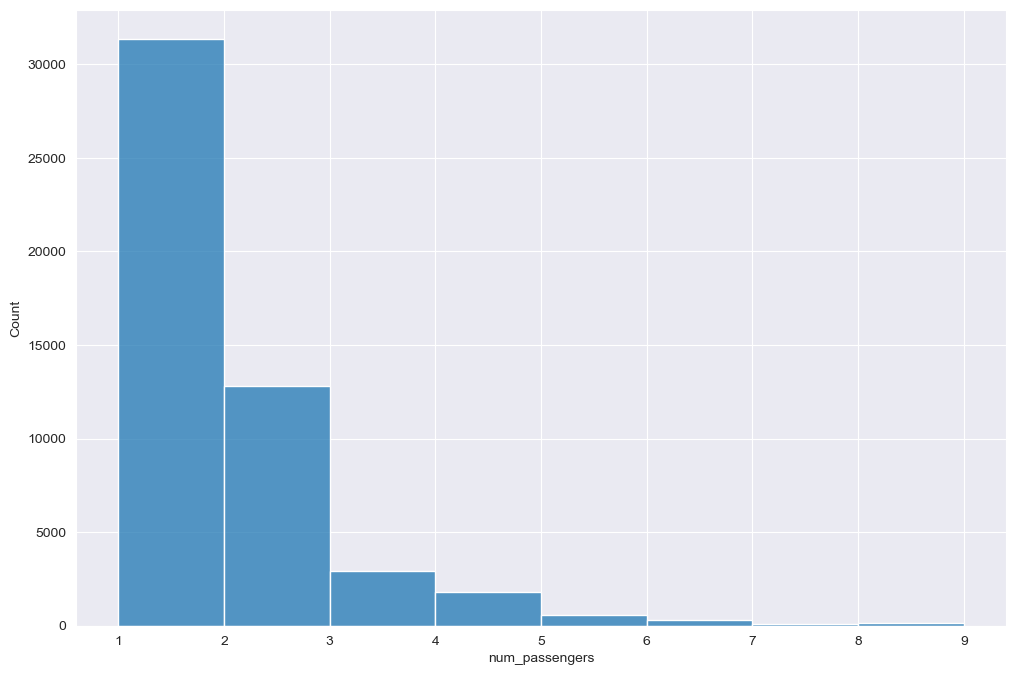

In [11]:
plt.figure(figsize=(12, 8))
sns.histplot(data=df['num_passengers'], stat='count', binwidth=1)

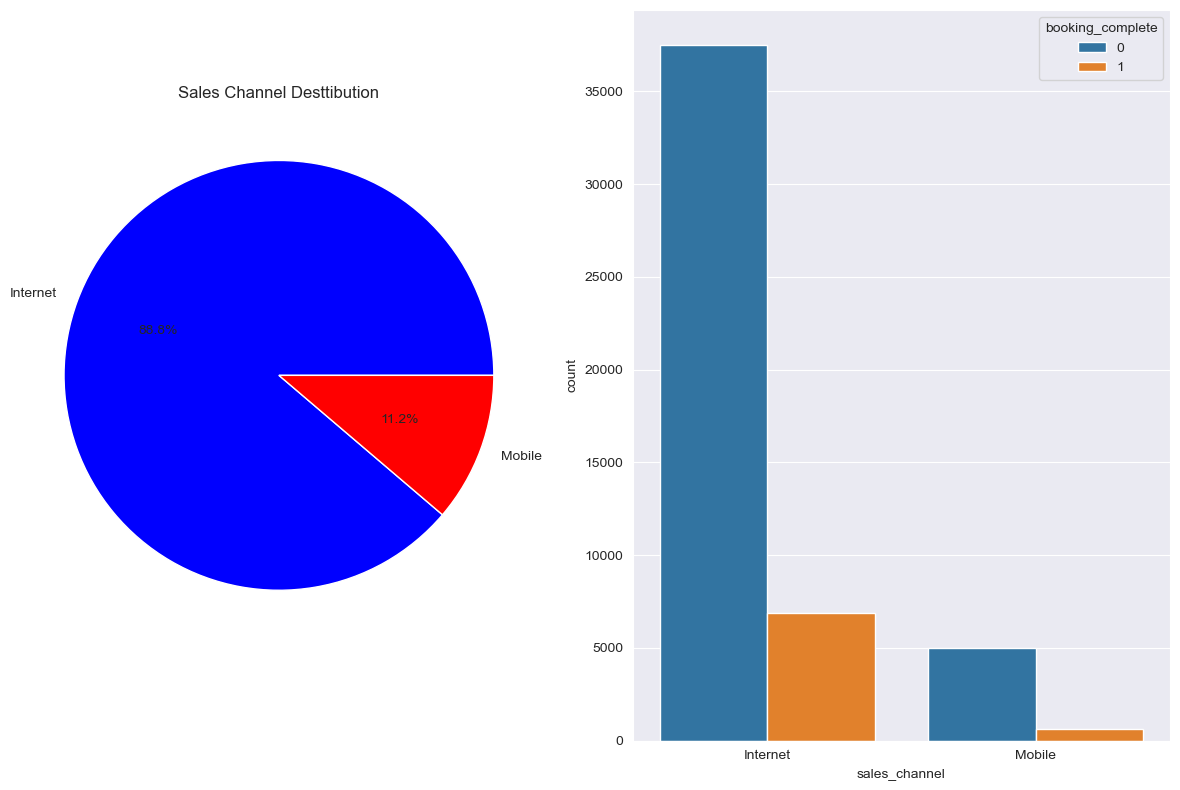

In [59]:
plt.figure(figsize=(12, 8))
plt.subplot(1, 2, 1)
plt.pie(df['sales_channel'].value_counts(), autopct='%1.1f%%', labels=['Internet', 'Mobile'], colors=['blue', 'red'])
plt.title('Sales Channel Desttibution')

plt.subplot(1, 2, 2)
sale_channel_booking = df.groupby('sales_channel')['booking_complete'].value_counts().reset_index()
ax = sns.barplot(sale_channel_booking, y='count', x='sales_channel', hue='booking_complete')

plt.tight_layout()
plt.show()

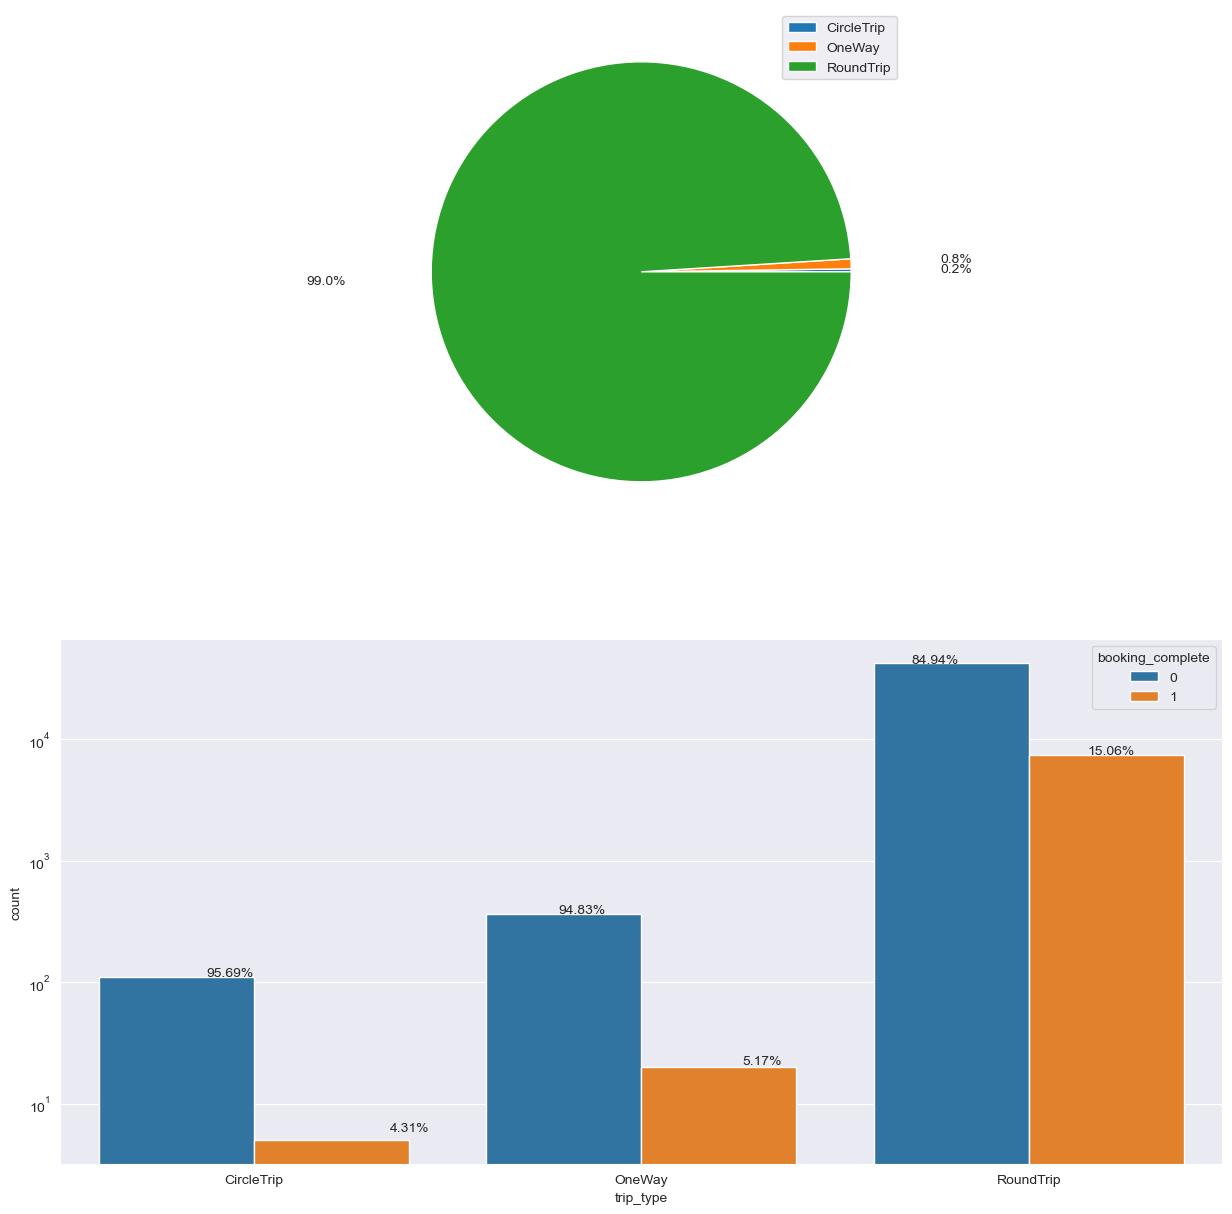

In [209]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 1, 1)
trip_types = df.groupby('trip_type')['num_passengers'].sum().reset_index()
plt.pie(trip_types['num_passengers'], autopct='%1.1f%%', pctdistance=1.5)
plt.legend(labels=trip_types['trip_type'])

plt.subplot(2, 1, 2)
trip_booking = df.groupby(['trip_type', 'booking_complete']).size().reset_index(name='count')
total_counts = trip_booking.groupby('trip_type')['count'].sum()
trip_booking['proportion'] = trip_booking.apply(lambda row: row['count'] / total_counts[row['trip_type']], axis=1)
ax = sns.barplot(x='trip_type', y='count', hue='booking_complete', data=trip_booking)

for i, row in trip_booking.iterrows():
    height = row['count']
    ax.text(i / 2.2, height + 1, '{:.2f}%'.format(row['proportion'] * 100), ha='right')
plt.yscale('log')
plt.show()



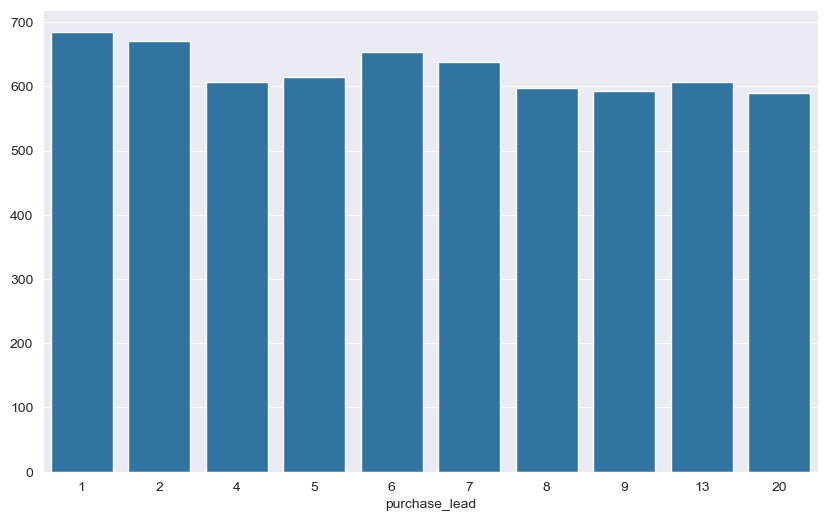

In [238]:
lead_performance = df['purchase_lead'].value_counts().head(10)

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=lead_performance.index, y=lead_performance.values)


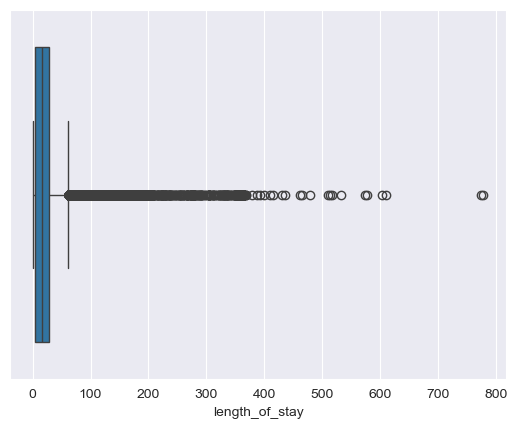

In [449]:
sns.boxplot(x=df['length_of_stay'])
plt.show()

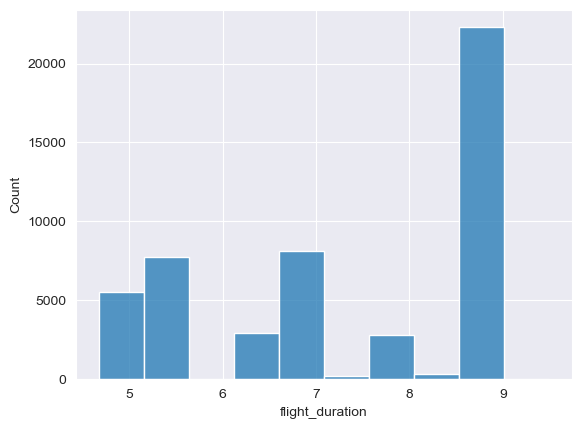

In [256]:
sns.histplot(x=df['flight_duration'], bins=10)
plt.show()

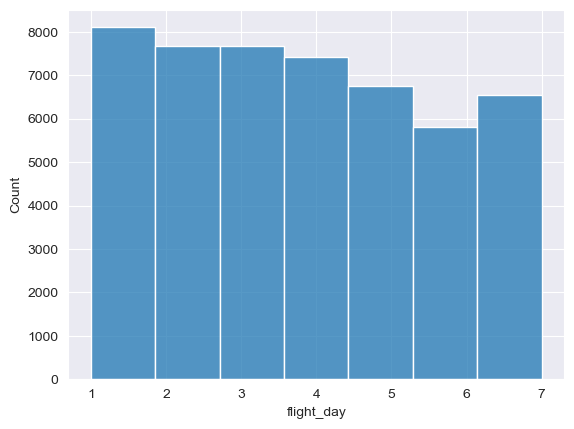

In [259]:
sns.histplot(x=df['flight_day'], bins=7)
plt.show()

In [263]:

from sklearn.model_selection import train_test_split


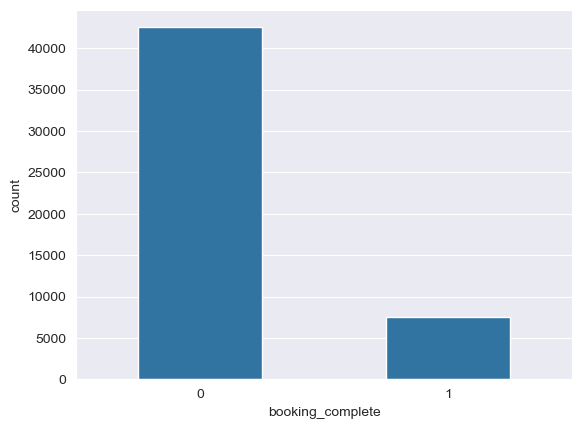

In [446]:
sns.barplot(df['booking_complete'].value_counts(),width=.5,label=['Booked', 'Unbooked'])
plt.show()

In [373]:
from sklearn.utils import resample

majority = df[df.booking_complete == 0]
minority = df[df.booking_complete == 1]

minority_over_sampled = resample(
    minority,
    n_samples=len(majority)
)

resampled_data = pd.concat([majority, minority_over_sampled])
resampled_data['booking_complete'].value_counts()


booking_complete
0    42522
1    42522
Name: count, dtype: int64

In [385]:
resampled_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33625,1,Internet,RoundTrip,47,4,10,5,KNOPUS,Indonesia,1,0,1,6.33,1
28435,1,Internet,RoundTrip,137,3,13,7,KIXPEN,Japan,1,1,0,7.00,1
39926,2,Internet,RoundTrip,30,5,0,3,KBVPEK,China,0,0,0,6.42,1
33566,1,Mobile,RoundTrip,40,4,9,6,KIXSIN,Singapore,1,0,0,7.00,1


In [386]:
y = resampled_data.booking_complete

X = resampled_data.drop('booking_complete', axis=1)

In [387]:
cat_cols = X.select_dtypes(include='object').columns
cols_label = []
cols_one_hot = []
for cols in cat_cols:
    if X[cols].nunique() > 5:
        cols_label.append(cols)
    else:
        cols_one_hot.append(cols)


In [393]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

label_encoder = LabelEncoder()
for col in cols_label:
    X[col] = label_encoder.fit_transform(X[col])

In [394]:
X

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration
0,2,Internet,RoundTrip,262,19,7,6,0,61,1,0,0,5.52
1,1,Internet,RoundTrip,112,20,3,6,0,61,0,0,0,5.52
2,2,Internet,RoundTrip,243,22,17,3,0,36,1,1,0,5.52
3,1,Internet,RoundTrip,96,31,4,6,0,61,0,0,1,5.52
4,2,Internet,RoundTrip,68,22,15,3,0,36,1,0,1,5.52
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33625,1,Internet,RoundTrip,47,4,10,5,563,37,1,0,1,6.33
28435,1,Internet,RoundTrip,137,3,13,7,542,43,1,1,0,7.00
39926,2,Internet,RoundTrip,30,5,0,3,505,17,0,0,0,6.42
33566,1,Mobile,RoundTrip,40,4,9,6,549,80,1,0,0,7.00


In [395]:


# Initialize encoders
oh_encoder = OneHotEncoder()
label_encoder = LabelEncoder()

# Create ColumnTransformer
processor = ColumnTransformer(
    transformers=[
        ('One Hot', oh_encoder, cols_one_hot),
    ],
    remainder='passthrough'
)

# Create Pipeline
pipeline = Pipeline([
    ('preprocessor', processor)
])

# Fit and transform data
pipeline.fit(X)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot', OneHotEncoder(),
                                                  ['sales_channel',
                                                   'trip_type'])]))])

In [396]:
X_processed = pipeline.transform(X)

In [402]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from catboost import CatBoostClassifier

X_train, X_test, y_train, y_test = train_test_split(X_processed, y, random_state=123)


In [411]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score


def model_eval(model):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    return f1_score(y_test, preds)

model_eval(SVC(kernel='rbf'))


KeyboardInterrupt: 

In [413]:
models = [RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), CatBoostClassifier()]
result = {}
for model in models:
    score = model_eval(model)
    result[str(type(model).__name__)] = score
    

/Users/anshujoshi/anaconda3/envs/Data_Science/lib/python3.9/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Learning rate set to 0.06075
0:	learn: 0.6828980	total: 20.9ms	remaining: 20.8s
1:	learn: 0.6742018	total: 39.8ms	remaining: 19.9s
2:	learn: 0.6653587	total: 54.2ms	remaining: 18s
3:	learn: 0.6580139	total: 67.5ms	remaining: 16.8s
4:	learn: 0.6521040	total: 79.2ms	remaining: 15.8s
5:	learn: 0.6463449	total: 91.5ms	remaining: 15.2s
6:	learn: 0.6411830	total: 105ms	remaining: 14.8s
7:	learn: 0.6364500	total: 118ms	remaining: 14.6s
8:	learn: 0.6309071	total: 133ms	remaining: 14.6s
9:	learn: 0.6266785	total: 145ms	remaining: 14.3s
10:	learn: 0.6230936	total: 159ms	remaining: 14.3s
11:	learn: 0.6193118	total: 173ms	remaining: 14.3s
12:	learn: 0.6167459	total: 189ms	remaining: 14.4s
13:	learn: 0.6143522	total: 203ms	remaining: 14.3s
14:	learn: 0.6119823	total: 217ms	remaining: 14.3s
15:	learn: 0.6098093	total: 231ms	remaining: 14.2s
16:	learn: 0.6079881	total: 243ms	remaining: 14s
17:	learn: 0.6051887	total: 256ms	remaining: 13.9s
18:	learn: 0.6034236	total: 267ms	remaining: 13.8s
19:	learn:

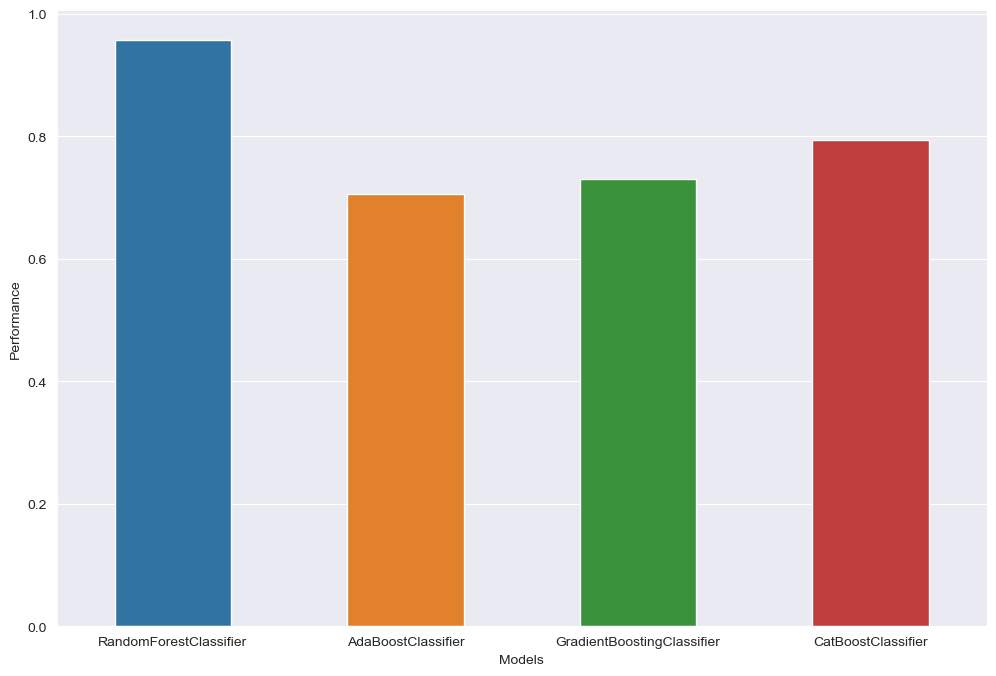

In [421]:
plt.figure(figsize=(12,8))
sns.barplot(x=result.keys(),y=result.values(),hue = result.keys(), width=.5)

plt.xlabel('Models')
plt.ylabel('Performance')
plt.show()

In [435]:
best_score = result['RandomForestClassifier']
print(f'The best performing model is Random Forest classifier with a score of {best_score}')

The best performing model is Random Forest classifier with a score of 0.9576831283275198
